# 📋 4주차 미션

## 라이브러리 및 데이터 로드 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

## 데이터 파악

In [3]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [4]:
print(df.shape)

(2772, 5)


In [5]:
df.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '시점', '데이터'], dtype='object')

In [6]:
df.describe(include="object")

,국가(대륙)별,상품군별,판매유형별,시점
count,2772,2772,2772,2772
unique,9,14,1,22
top,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4
freq,308,198,2772,126


In [7]:
df["판매유형별"].value_counts()

판매유형별
면세점 이외    2772
Name: count, dtype: int64

## 📌 Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.
- 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
- describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
- 전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
- 데이터는 위에서 제공된 데이터를 사용합니다.
- 해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!

#### 컬럼명 변경

In [8]:
df = df.rename(columns={'데이터': '백만'})

#### 연도 분리

In [9]:
df["연도"] = df["시점"].str.extract(r'(\d{4})').astype(int)

#### 분기 분리

In [10]:
df["분기"] = list(map(lambda x : int(x.split(".")[1].split()[0].split("/")[0]), df["시점"]))

In [11]:
description = df.describe() 

In [12]:
description.applymap('{:.0f}'.format) #소수점을 출력하지 않기 위한 방법

C:\Users\user\AppData\Local\Temp\ipykernel_8836\217188363.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  description.applymap('{:.0f}'.format) #소수점을 출력하지 않기 위한 방법


,백만,연도,분기
count,2772,2772,2772
mean,1613,2019,2
std,4273,2,1
min,-10003,2017,1
25%,42,2018,1
50%,292,2019,2
75%,1181,2021,3
max,47689,2022,4


## 📌 Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.
- 국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
- pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
- 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [13]:
result = df.pivot_table(index="국가(대륙)별", columns="연도", values="백만", aggfunc="sum")
result

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


<Axes: xlabel='연도', ylabel='국가(대륙)별'>

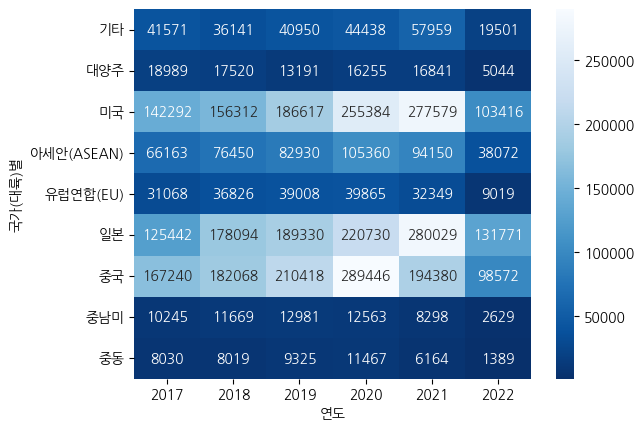

In [14]:
sns.heatmap(result, cmap = "Blues_r", annot=True, fmt=".0f")

## 📌 Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.
- 2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
- 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [15]:
df_2020 = df[df['연도'] == 2020]
df_2020[:2]

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
12,미국,컴퓨터 및 주변기기,면세점 이외,2020.1/4,1182,2020,1
13,미국,컴퓨터 및 주변기기,면세점 이외,2020.2/4,1631,2020,2


In [16]:
grouped = df_2020.groupby(['국가(대륙)별', '상품군별'])['백만'].sum()

In [17]:
pivot_table = grouped.unstack()
pivot_table

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
국가(대륙)별,,,,,,,,,,,,,,
기타,1716,3345,9,187,1464,4563,21,755,1646,1596,1410,6501,5653,15572
대양주,3825,923,1,21,1198,367,20,690,484,403,1800,3746,318,2459
미국,10103,38731,33,398,11467,9709,865,5862,4934,2706,32919,82154,6057,49446
아세안(ASEAN),12405,2620,17,3279,6432,4192,3,7423,2698,4291,16135,37992,541,7332
유럽연합(EU),3040,3907,0,25,2560,514,99,1297,1354,423,12092,5120,1910,7524
일본,404,30509,2,1526,3911,1055,27,646,1353,4699,14738,119452,193,42215
중국,1353,22736,88,403,7142,6659,4,3999,5606,4220,125078,73068,235,38855
중남미,912,625,0,3,1361,188,15,183,151,774,6421,614,362,954
중동,839,533,0,4,1060,139,17,196,121,927,3250,1776,388,2217


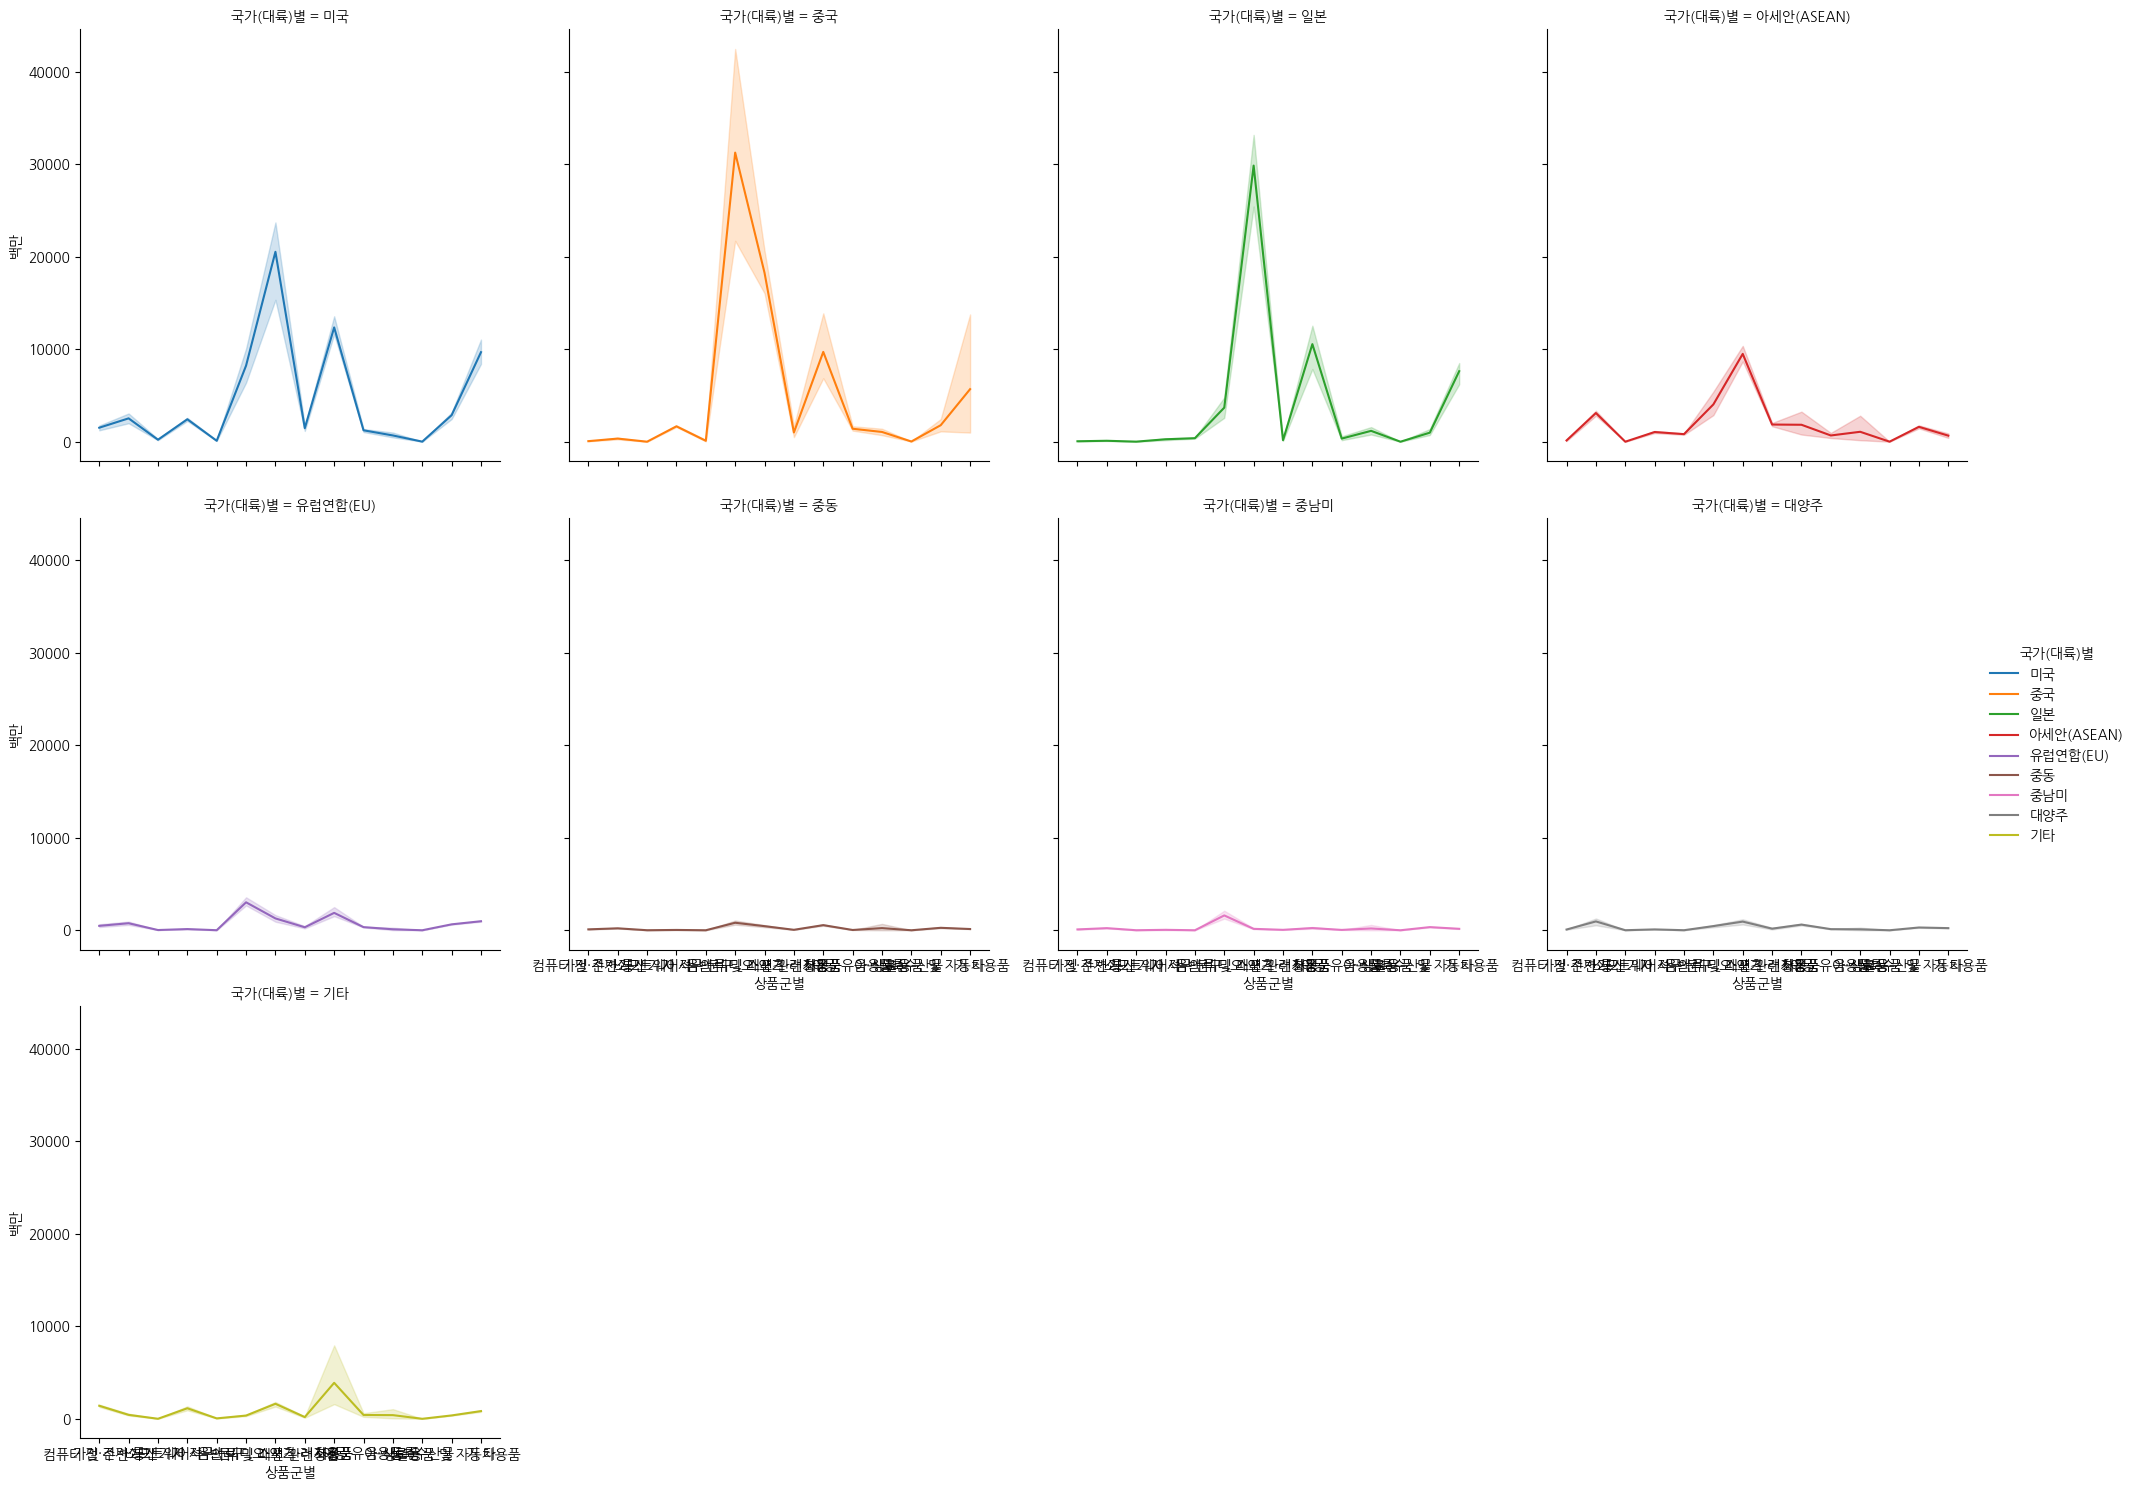

In [63]:
sns.relplot(data=df_2020, x="상품군별", y="백만", hue="국가(대륙)별", kind="line", col="국가(대륙)별", col_wrap=4)

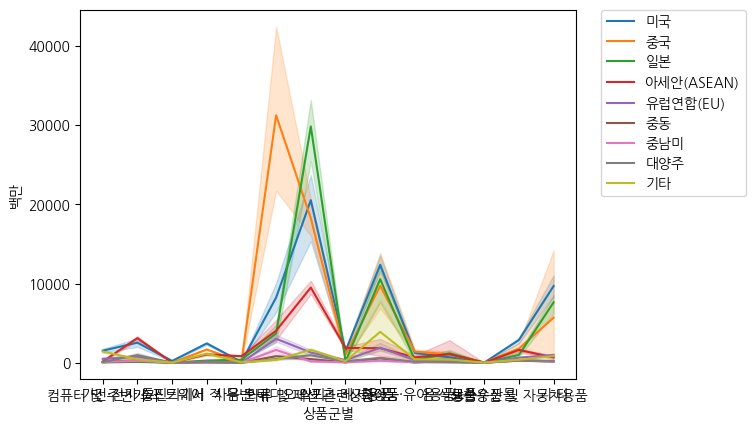

In [19]:
sns.lineplot(data=df_2020, x="상품군별", y="백만", hue="국가(대륙)별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 

## 📌 Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.
- 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
- 시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.

In [20]:
# 데이터 필터링: "미국", "중국", "일본" 지역 및 주요 상품군 선택
filtered_df = df[(df['국가(대륙)별'].isin(["미국", "중국", "일본"])) &
                 (df['상품군별'].isin(["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"])) &
                 (df['연도'] <= 2021)]  # 2021년까지의 데이터만 선택

<Axes: xlabel='연도', ylabel='백만'>

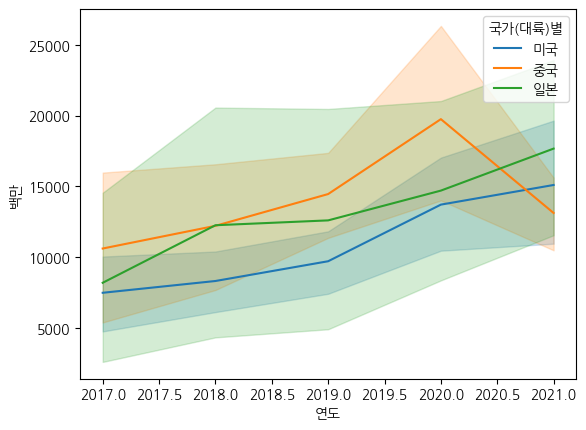

In [21]:
sns.lineplot(data=filtered_df, x="연도", y="백만", hue="국가(대륙)별")

<Axes: xlabel='연도', ylabel='백만'>

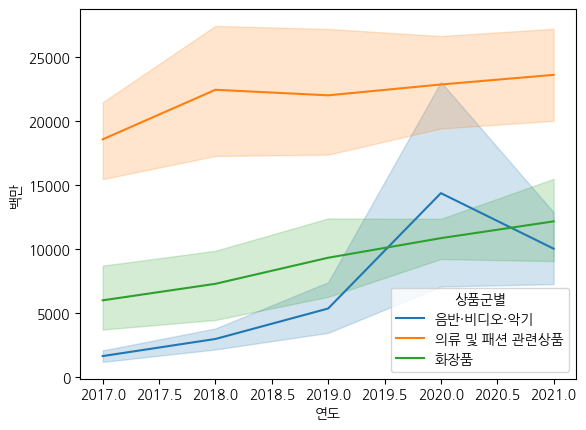

In [40]:
sns.lineplot(data=filtered_df, x="연도", y="백만", hue="상품군별")

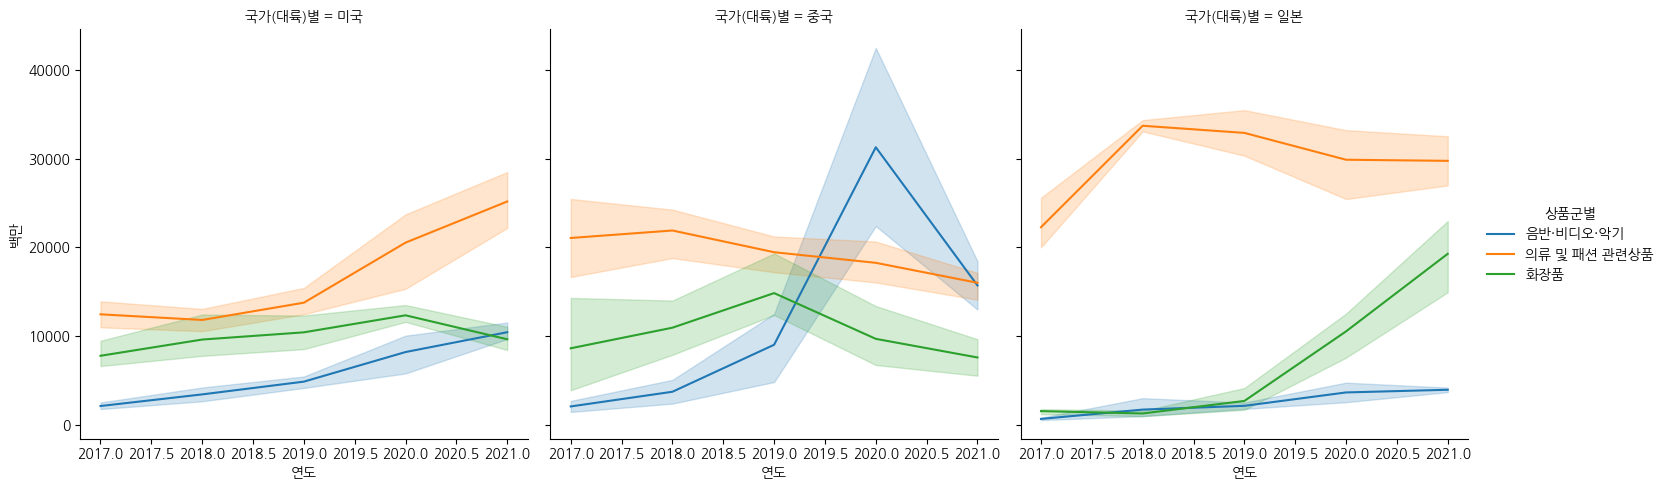

In [61]:
# 데이터 시각화
sns.relplot(data=filtered_df, x="연도", y="백만", hue="상품군별", kind="line", col="국가(대륙)별", col_wrap=3)

## 📌 Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!
- 지금까지 익힌 방법으로 다른 데이터에도 같은 방법을 통해 분석해 볼 수 있을 것입니다.
- KOSIS(https://kosis.kr/) 사이트에서 관심있는 분야의 데이터를 찾고 원하는 시각화를 해주세요!
- 조회조건에 계, 합계 등을 미리 제거하고 다운로드 받으면 전처리를 줄일 수 있습니다.
- 행렬전환 기능을 사용하면 따로 melt를 진행하지 않아도 되기 때문에 이 또한 전처리를 줄일 수 있습니다.